# TREINANDO MODELO

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!gdown 1EfYiRv3ZmrW6pFTFSHLHwYLOlMTpJTsT

Downloading...
From (original): https://drive.google.com/uc?id=1EfYiRv3ZmrW6pFTFSHLHwYLOlMTpJTsT
From (redirected): https://drive.google.com/uc?id=1EfYiRv3ZmrW6pFTFSHLHwYLOlMTpJTsT&confirm=t&uuid=88ab4df7-95ec-4a42-8783-384348c1ef9b
To: /content/dataset.zip
100% 109M/109M [00:02<00:00, 47.6MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/ARARA-AZUL/
  inflating: dataset/ARARA-AZUL/istockphoto-1006235376-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1008495474-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1015804962-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1022259024-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1023638574-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1025300302-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1027555546-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1032694086-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1041146702-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1043212752-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1043936538-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-104699178-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1047989278-612x612.jpg  
  inflating: dataset/ARARA-

In [ ]:
caminho_pasta = 'dataset/'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    caminho_pasta,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='training')

Found 1830 images belonging to 4 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    caminho_pasta,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='validation')

Found 455 images belonging to 4 classes.


In [ ]:
inputs = Input(shape=(224, 224, 3))

In [ ]:
x = Conv2D(64, (5, 5), activation='relu')(inputs)
x = MaxPooling2D(4, 4)(x)

In [ ]:
x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D(4, 4)(x)

In [ ]:
x = Conv2D(256, (5, 5), activation='relu')(x)
x = MaxPooling2D(4, 4)(x)

In [ ]:
x = Flatten()(x)
x = Dense(256, activation='relu')(x)

In [ ]:
outputs = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50
91/91 [==============================] - 287s 3s/step - loss: 0.6607 - accuracy: 0.7309 - val_loss: 0.4431 - val_accuracy: 0.8591
Epoch 2/50
91/91 [==============================] - 283s 3s/step - loss: 0.2538 - accuracy: 0.9160 - val_loss: 0.4045 - val_accuracy: 0.8727
Epoch 3/50
91/91 [==============================] - 297s 3s/step - loss: 0.1751 - accuracy: 0.9414 - val_loss: 0.1529 - val_accuracy: 0.9500
Epoch 4/50
91/91 [==============================] - 302s 3s/step - loss: 0.1570 - accuracy: 0.9448 - val_loss: 0.2527 - val_accuracy: 0.9136
Epoch 5/50
91/91 [==============================] - 298s 3s/step - loss: 0.1327 - accuracy: 0.9575 - val_loss: 0.1357 - val_accuracy: 0.9591
Epoch 6/50
91/91 [==============================] - 299s 3s/step - loss: 0.0833 - accuracy: 0.9702 - val_loss: 0.1028 - val_accuracy: 0.9591
Epoch 7/50
91/91 [==============================] - 282s 3s/step - loss: 0.0732 - accuracy: 0.9762 - val_loss: 0.1373 - val_accuracy: 0.9545
Epoch 8/50
91

In [ ]:
val_loss, val_accuracy = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // validation_generator.batch_size
)

print(f"Perda de validação: {val_loss:.2f}")
print(f"Precisão de validação: {val_accuracy * 100:.2f}%")

22/22 [==============================] - 22s 989ms/step - loss: 0.2705 - accuracy: 0.9750
Perda de validação: 0.27
Precisão de validação: 97.50%




# SALVANDO MODELO

In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/My Drive/models/IAA-MODELO-CNN-02.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CARREGANDO MODELO E REALIZANDO A PREDIÇÃO

In [ ]:
loaded_model = load_model('/content/drive/My Drive/models/IAA-MODELO-CNN-02.h5')

In [ ]:
validation_generator.reset()
for x_batch, y_batch in validation_generator:
    image_data = x_batch[3]
    break

1/1 [==============================] - 0s 27ms/step
Predição:  ONÇA-PINTADA


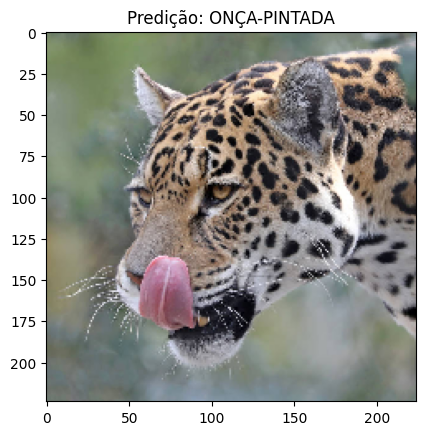

In [ ]:
prediction = loaded_model.predict(np.expand_dims(image_data, axis=0))

class_names = ['ARARA-AZUL', 'ARIRANHA', 'MICO-LEÃO-DOURADO', 'ONÇA-PINTADA']

predicted_class_index = np.argmax(prediction)

predicted_class = class_names[predicted_class_index]

print("Predição: ", predicted_class)

plt.imshow(image.array_to_img(image_data))
plt.title(f'Predição: {predicted_class}')
plt.show()

# ANÁLISE DOS RESULTADOS (RELATÓRIO)

Os resultados obtidos podem ser resumidos em duas partes: Resultados Quantitativos (acurácia do modelo) e Resultados Qualitativos (imagens e predições feitas pelo modelo).

- Resultados Quantitativos:
1. O modelo foi treinado com sucesso e alcançou uma precisão de validação de aproximadamente 98% após realizar 50 épocas de treinamento. Isso significa que o modelo é capaz de classificar corretamente quase que a sua totalidade das imagens no conjunto de validação.
2. A acurácia deste modelo aumentou em relação ao MODELO-CNN-01, pois neste foram realizadas alguns ajustes nos hiperparâmetreos. Foi adicionada mais uma camada convolacional, aumentado o número de filtros nas três camadas e neorônios.
3. É possível que erros possam acontecer, a acurácia não é de 100%, mas a chance de erro na predição segundo os números é baixa.

- Resultados Qualitativos:
1. Ao observar as imagens que temos como resposta e as predições feitas, podemos ver como o modelo está se saindo em termos de classificação. No último resultado salvo, podemos ver que a imagem que é mostrada condiz com a predição realizada pelo modelo, ou seja, faz uma predição acertiva sobre qual classe ela pertence. Apresentou uma Onça-Pintada e a predição foi uma Onça-Pintada.
2. Em resumo, o modelo treinado apresenta um desempenho considerado ótimo, levando em conta sua porcentagem de precisão de validação.